<a href="https://colab.research.google.com/github/gitdesil/C-Users-Usuario-Documents-GitHub-EMTSTISPC/blob/main/Clase_N%C2%B01_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conocimiento del negocio

En este conjunto de datos, cada entrada representa a una persona que solicita un crédito a un banco. Cada persona se clasifica como riesgo de crédito bueno o malo según el conjunto de atributos.

Columnas del data set:

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark) // datos previos al Euro (moneda alemana)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
* Risk (Value target - Good or Bad Risk)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMPORTAR LIBRERIAS**

In [ ]:
import pandas as pd # Para trabajar con el conjunto de datos
import numpy as np # Biblioteca matemática
import seaborn as sns # Biblioteca de gráficos que utiliza matplot en segundo plano
import matplotlib.pyplot as plt # para trazar algunos parámetros en seaborn

**IMPORTAR EL DATA SET**

In [ ]:
datos=pd.read_csv('/content/drive/MyDrive/Cursos/DS UTN/german_credit_data.csv', index_col=0)

In [ ]:
datos

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


# Preparación y transformación

**DESCUBRIMIENTO DEL DATA SET**

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
#VERIFICANDO LA FORMA DEL CONJUNTO DE DATOS
datos.shape

(1000, 10)

In [ ]:
datos.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
datos.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

Tenemos 4 características numéricas y 5 características categóricas.
Las columnas 'Saving accounts' y 'Checking account' tienen valores nulos.
La columna 'Job' tiene valores categóricos pero codificados como int64.

**VALORES UNICOS**

In [ ]:
datos.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [ ]:
#imprimiendo valores únicos de las columnas categóricas
for i in datos.select_dtypes(include=['object', 'category']).columns:
  print(f"{i} : {datos[i].unique()}\n")


Sex : ['male' 'female']

Housing : ['own' 'free' 'rent']

Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']

Checking account : ['little' 'moderate' nan 'rich']

Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']

Risk : ['good' 'bad']



**LIMPIEZA DE DATOS**

In [ ]:
#Comprobando cuántos valores nulos hay en cada columna
datos.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

La columna 'Saving accounts' tiene 183 valores nulos.
La columna 'Checking account' tiene 394 valores nulos.

In [ ]:
#Creando un data set de valores faltantes
missing_df = datos.isnull()

#Calculando la correlación entre la ausencia de valores en diferentes columnas
corr = missing_df.corr()


corr

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,NaN,NaN,NaN,NaN,1.000000,0.142364,NaN,NaN,NaN,NaN
Checking account,NaN,NaN,NaN,NaN,0.142364,1.000000,NaN,NaN,NaN,NaN
Credit amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purpose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Risk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No hay correlacion entre las faltantes

Se decide imputar los valores faltantes con "Unknown"

In [ ]:
columnas_para_imputar = ['Saving accounts', 'Checking account']

for columna in columnas_para_imputar:
    datos[columna].fillna("Unknown", inplace=True)

In [ ]:
datos.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

**TRANSFORMACIÓN DE LOS DATOS**

In [ ]:
datos['Job'] = datos['Job'].astype('category')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   object  
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   object  
 4   Saving accounts   1000 non-null   object  
 5   Checking account  1000 non-null   object  
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   object  
 9   Risk              1000 non-null   object  
dtypes: category(1), int64(3), object(6)
memory usage: 79.3+ KB


# Visualización

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1000 non-null   int64   
 1   Sex               1000 non-null   object  
 2   Job               1000 non-null   category
 3   Housing           1000 non-null   object  
 4   Saving accounts   1000 non-null   object  
 5   Checking account  1000 non-null   object  
 6   Credit amount     1000 non-null   int64   
 7   Duration          1000 non-null   int64   
 8   Purpose           1000 non-null   object  
 9   Risk              1000 non-null   object  
dtypes: category(1), int64(3), object(6)
memory usage: 79.3+ KB


In [ ]:
# Lista de columnas numéricas
columnas_numericas = ['Age', 'Credit amount', 'Duration']

# Número de columnas para la cuadrícula de subgráficos
num_cols = len(columnas_numericas)

# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(18, 6))

# Dibujar un histograma y KDE para cada columna numérica
for i, col in enumerate(columnas_numericas):
    sns.histplot(datos[col], kde=True, color="#729da3", ax=axs[i])
    axs[i].set_title(col)

# Mostrar la figura con subgráficos
plt.tight_layout()
plt.show()



NameError: ignored

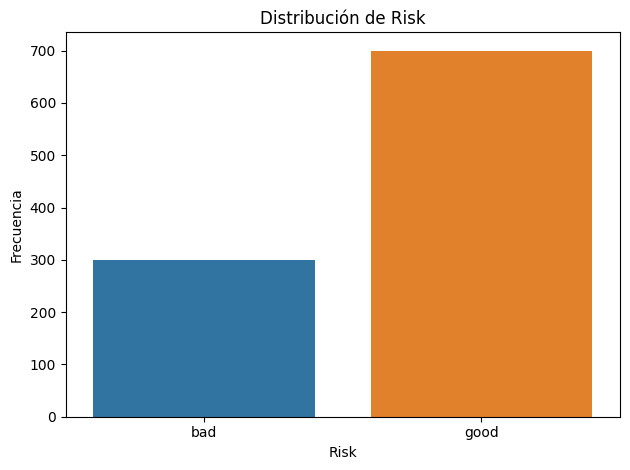

In [ ]:
# Convertir la columna 'Risk' a categórica si no lo está ya
datos['Risk'] = datos['Risk'].astype('category')

# Gráfico de barras para la distribución de 'Risk'
sns.countplot(data=datos, x='Risk')
plt.title('Distribución de Risk')
plt.xlabel('Risk')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


